In [5]:
import os
import cv2
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import keras 
from keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Files
path='F:/2024/sarah_2024/Projects/Fire_detection/archive/fire_dataset'
pd.DataFrame(os.listdir(path),columns=['Files'])

Files
0      fire
1  non_fire

In [4]:
train_data_dir =path
batch_size = 32
target_size = (224, 224)
validation_split = 0.2
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=200,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=44,
    image_size=target_size,
    batch_size=batch_size,
)

Found 999 files belonging to 2 classes.
Using 800 files for training.
Found 999 files belonging to 2 classes.
Using 199 files for validation.


In [29]:
validation[0]

TypeError: '_PrefetchDataset' object is not subscriptable

In [5]:
class_names = train.class_names
class_names

['fire', 'non_fire']

In [6]:
plt.figure(figsize=(15, 25))
for images, labels in train.take(1):
    for i in range(32):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [12]:
!pip install pydot
!pip install graphviz
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=120)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [15]:
# Define the base model
base_model = tf.keras.applications.VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

# Define the model architecture
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

# Print model summary
model.summary()

# Define callbacks
checkpoint_cb = ModelCheckpoint("F:/2024/sarah_2024/Projects/Fire_detection/my_keras_model.keras", save_best_only=True)
early_stopping_cb = EarlyStopping(patience=3, restore_best_weights=True)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
hist = model.fit(
    train,
    epochs=20,
    validation_data=validation,
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │          25,089 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,739,777 (56.23 MB)

 Trainable params: 25,089 (98.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 111s 4s/step - accuracy: 0.7716 - loss: 3.8983 - val_accuracy: 0.9698 - val_loss: 0.2658
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 123s 5s/step - accuracy: 0.9811 - loss: 0.2887 - val_accuracy: 0.9799 - val_loss: 0.2332
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 128s 5s/step - accuracy: 0.9796 - loss: 0.1534 - val_accuracy: 0.9749 - val_loss: 0.2254
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 129s 5s/step - accuracy: 0.9928 - loss: 0.0215 - val_accuracy: 0.9899 - val_loss: 0.2068
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 131s 5s/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.9849 - val_loss: 0.2161
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 126s 5s/step - accuracy: 0.9991 - loss: 0.0066 - val_accuracy: 0.9799 - val_loss: 0.2250
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 128s 5s/step - accuracy: 0.9994 - loss: 0.0020 - val_accuracy: 0.9849 - val_loss: 0.2012
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 124s 5s/step - accuracy: 1.0000 - loss: 5.6869e-04 - val_accuracy: 0.9849

In [16]:
score, acc = model.evaluate(validation)
print('Test Loss =', score)
print('Test Accuracy =', acc)

7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9734 - loss: 0.4096
Test Loss = 0.19998855888843536
Test Accuracy = 0.9849246144294739


In [17]:
hist_=pd.DataFrame(hist.history)
hist_

accuracy      loss  val_accuracy  val_loss
0    0.85000  2.681871      0.969849  0.265761
1    0.98000  0.199628      0.979900  0.233244
2    0.98375  0.099851      0.974874  0.225432
3    0.99250  0.020937      0.989950  0.206784
4    1.00000  0.000897      0.984925  0.216064
5    0.99875  0.009182      0.979900  0.225046
6    0.99875  0.003758      0.984925  0.201197
7    1.00000  0.000605      0.984925  0.204707
8    1.00000  0.000004      0.984925  0.199989
9    0.99750  0.009507      0.974874  0.200434
10   1.00000  0.000057      0.984925  0.234852
11   1.00000  0.000164      0.984925  0.232758

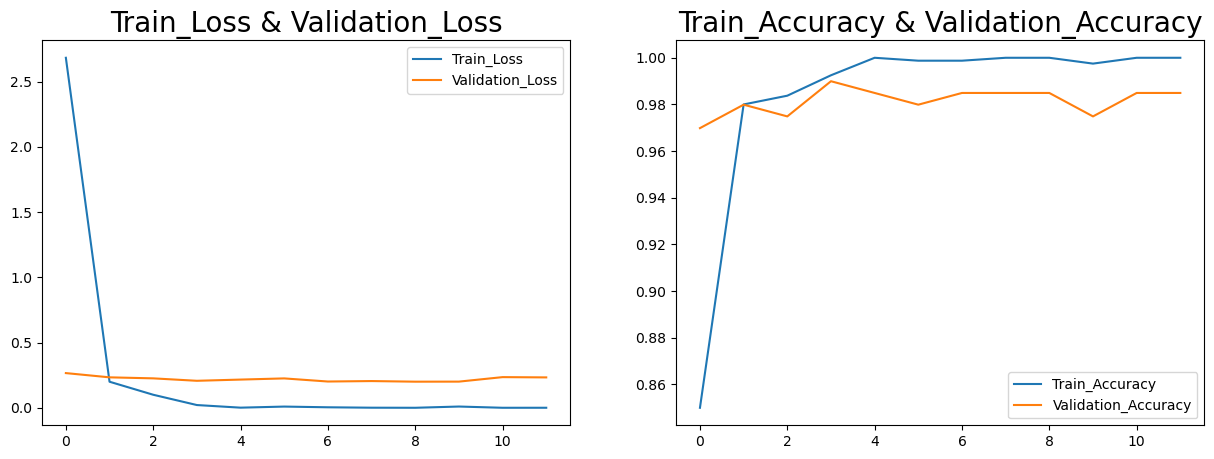

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

In [19]:
X_val,y_val=[],[]
for images, labels in validation:
    y_val.extend(labels.numpy())
    X_val.extend(images.numpy())
predictions=model.predict(np.array(X_val))
y_pred=np.where(predictions>=.5,1,0)
df=pd.DataFrame()
df['Actual'],df['Prediction']=y_val,y_pred
df

7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step


Actual  Prediction
0         0           0
1         0           0
2         1           1
3         1           1
4         1           1
..      ...         ...
194       1           1
195       1           1
196       1           1
197       1           1
198       0           0

[199 rows x 2 columns]

In [20]:
plt.figure(figsize=(25,25))
for i in range(32):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(X_val[i].astype("uint8"))
    plt.title(f'{class_names[y_val[i]]} :: {class_names[y_pred[i][0]]}')
    plt.axis("off")

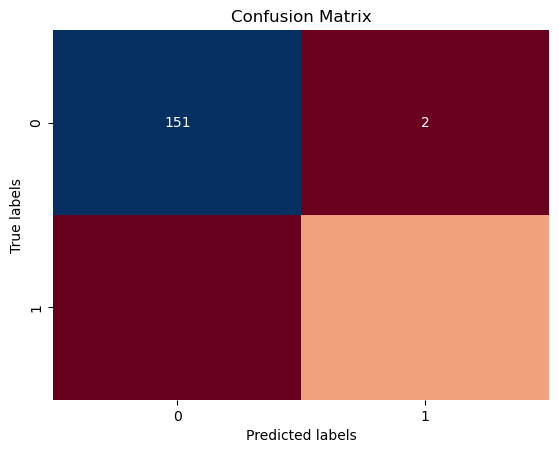

array([[151,   2],
       [  1,  45]], dtype=int64)

In [22]:
ax= plt.subplot()
CM = confusion_matrix(y_val,y_pred)
sns.heatmap(CM, annot=True, fmt='g', ax=ax,cbar=False,cmap='RdBu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
plt.show()
CM

In [23]:
ClassificationReport = classification_report(y_val,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.99      0.99      0.99       153
           1       0.96      0.98      0.97        46

    accuracy                           0.98       199
   macro avg       0.98      0.98      0.98       199
weighted avg       0.99      0.98      0.98       199



In [56]:
path = 'F:/2024/sarah_2024/Projects/Fire_detection/archive/fire_dataset/fire/fire.5.png'
image = cv2.imread(path)
image = cv2.resize(image, (224, 224))
image =cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image = np.expand_dims(image, axis=0)
predict = save_model.predict(image)
predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


array([[0.]], dtype=float32)

In [6]:
import keras
def Test(path):
    print(path)
    save_model = keras.models.load_model('F:/2024/sarah_2024/Projects/Fire_detection/my_keras_model.keras')
    images = []
    pred = []
    class_names = ['fire_images', 'non_fire_images']
    for img in os.listdir(path):
        image = cv2.imread(os.path.join(path, img))
        image = cv2.resize(image, (224, 224))
        image =cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        images.append(image)
        image = np.expand_dims(image, axis=0)
        predict = save_model.predict(image)
        pred.append(np.where(predict >= 0.5, 1, 0))
    plt.figure(figsize=(25, 25))
    for i in range(len(pred)):
        plt.subplot(int(np.ceil(len(pred) / 2)), 2, i + 1)
        plt.imshow(images[i].astype("uint8"))
        plt.title(f'{class_names[pred[i][0][0]]}')
        plt.axis("off")
    plt.show()

Test('F:/2024/sarah_2024/Projects/Fire_detection/archive/fire_dataset/fire')

F:/2024/sarah_2024/Projects/Fire_detection/archive/fire_dataset/fire
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 920ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/